In [1]:
# import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Read the CSV file
data = pd.read_csv('Fuel.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Let's select some features to explore more :
data = data[['ENGINESIZE', 'CO2EMISSIONS']]

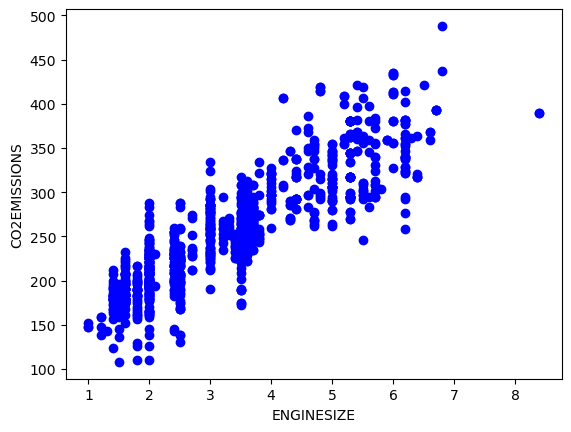

In [4]:
# ENGINESIZE VS CO2EMISSIONS
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'],
color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [6]:
# Generating training and testing data from our data
# We are using 80% data for training and 20%  for testing 
train = data[:(int((len(data)*0.8)))]
test = data[int((len(data)*0.8)):]
print(train)
print(test)

     ENGINESIZE  CO2EMISSIONS
0           2.0           196
1           2.4           221
2           1.5           136
3           3.5           255
4           3.5           244
..          ...           ...
848         3.5           251
849         3.5           271
850         2.0           214
851         3.5           244
852         3.5           253

[853 rows x 2 columns]
      ENGINESIZE  CO2EMISSIONS
853          2.5           202
854          3.5           255
855          2.5           191
856          2.5           198
857          1.8           161
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[214 rows x 2 columns]


The first output is when there is training at 20 and the second is training at 80. 

In [8]:
# Modeling 
# Using sklearn package to model data:
regr = linear_model.LinearRegression()
train_x =np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
#The coefficient
print('coefficient `:', regr.coef_) # Slope
print('Intercept `:', regr.intercept_) #Interpect

coefficeient `: [[38.79512384]]
Intercept `: [127.16989951]


What is ment by the coefficient is the number which is next to the X value in this equation - Y = 38.79512384x + 127.16989951

Text(0, 0.5, 'CO2 EMISSIONS')

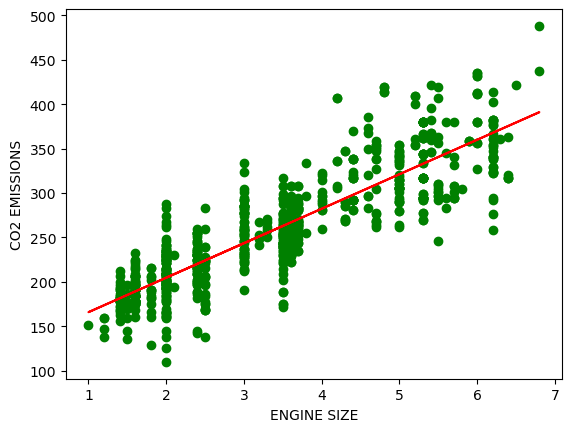

In [10]:
# Plotting the regression line:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'],
color='green')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, 'r')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')

In [11]:
# Predicting values
# Function for predicting future values:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features * slope + intercept
    return predicted_values

In [12]:
# Predicting emission for futute car:
my_engine_size = 3.5
estimated_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print('Estimated Emission :',estimated_emission)

Estimated Emission : 262.9528329350173


In [13]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [ ]:
print()
print()
print()